<a href="https://colab.research.google.com/github/DivyaNalluri1/FML_LAb/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd



In [82]:
data = pd.read_csv("/content/titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

filling Null values

In [86]:
data['Age'] = data['Age'].fillna(data.groupby(['Pclass','Sex'])['Age'].transform('mean'))

In [87]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
data.drop("Cabin",inplace=True,axis=1)


In [89]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [90]:
data.drop("Embarked",inplace=True,axis=1)


In [91]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [92]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


Normalizing the age

In [94]:
data['Age'].mean(),data['Age'].std(),data['Age'].min(),data['Age'].max(),data['Age'].var()

(29.318642716644145, 13.281102760334132, 0.42, 80.0, 176.38769053055492)

In [100]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
np.array(data['Age']).shape

(891,)

In [110]:
X=np.array(data['Age']).reshape(-1,1)

In [111]:
X.shape

(891, 1)

In [112]:
scaler.fit(X)

StandardScaler()

In [113]:
Y=scaler.transform(X)

In [114]:
Y.mean()

2.2329064647904385e-16

In [115]:
data['Age'] = pd.Series(Y.reshape(-1))

In [116]:
data['Age'].mean(),data['Age'].std(),data['Age'].min(),data['Age'].max()

(2.2329064647904385e-16,
 1.0005616400330457,
 -2.177144012291871,
 3.818193630274983)

Graphical representation of age

<Axes: >

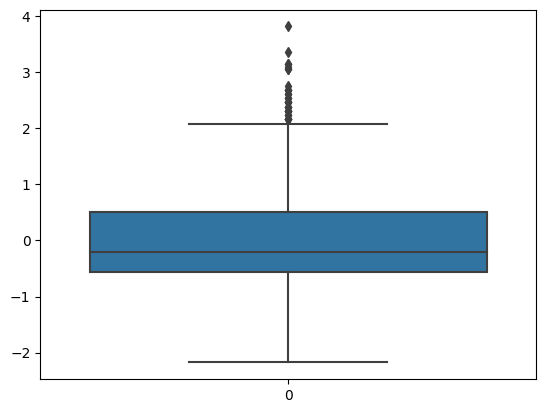

In [117]:
import seaborn as sns 
sns.boxplot(data['Age'])

In [118]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.551366,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.654030,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.250017,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.428018,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0.428018,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.174680,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.777378,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.570201,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.250017,0,0,111369,30.0000


importing required libraries for logistic Regression

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

Assigning input and output

In [121]:
x1 = data.drop('Survived',axis=1)
y1 = data['Survived']
x1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,3,"Braund, Mr. Owen Harris",male,-0.551366,1,0,A/5 21171,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.654030,1,0,PC 17599,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,-0.250017,0,0,STON/O2. 3101282,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.428018,1,0,113803,53.1000
4,5,3,"Allen, Mr. William Henry",male,0.428018,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,-0.174680,0,0,211536,13.0000
887,888,1,"Graham, Miss. Margaret Edith",female,-0.777378,0,0,112053,30.0000
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.570201,1,2,W./C. 6607,23.4500
889,890,1,"Behr, Mr. Karl Howell",male,-0.250017,0,0,111369,30.0000


Replacing Strings

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x1["Name"] = le.fit_transform(data["Name"])
x1["Sex"] = le.fit_transform(data["Sex"])
x1["Ticket"] = le.fit_transform(data["Ticket"])

Splitting of data as Train and Test data 

In [123]:
X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

Logistic Regression

In [124]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred = log_reg.predict(X_test)
y_pred

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

CONFUSION MATRIX

In [125]:
cm = confusion_matrix(Y_test,y_pred)

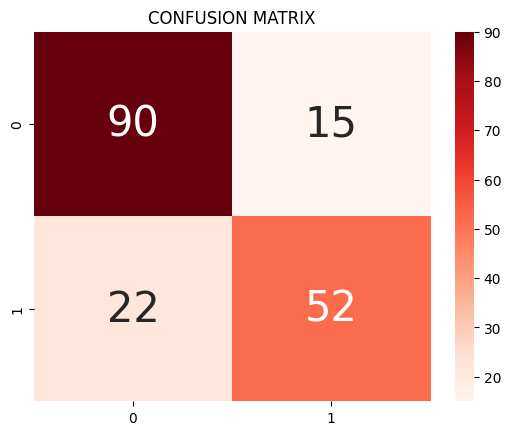

In [127]:
ax=plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Reds",ax=ax)
ax.set_title('CONFUSION MATRIX')
plt.show()